In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_pickle("Loan_status.pkl")

In [4]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3

In [5]:
# Step 1: Split off untouched data (10%)
df_train_val, df_untouched = train_test_split(df, test_size=0.10, random_state=42)

# Step 2: Split remaining into train (50%), validation (20%), and test (20%)
df_train, df_temp = train_test_split(df_train_val, test_size=0.40, random_state=42)  # 50% training, 40% left for val+test
df_val, df_test = train_test_split(df_temp, test_size=0.50, random_state=42)  # Split equally into validation & test

# Check dataset sizes
print(f"Training Set: {len(df_train)} rows ({len(df_train)/len(df)*100:.1f}%)")
print(f"Validation Set: {len(df_val)} rows ({len(df_val)/len(df)*100:.1f}%)")
print(f"Test Set: {len(df_test)} rows ({len(df_test)/len(df)*100:.1f}%)")
print(f"Untouched Set: {len(df_untouched)} rows ({len(df_untouched)/len(df)*100:.1f}%)")

Training Set: 1579765 rows (54.0%)
Validation Set: 526589 rows (18.0%)
Test Set: 526589 rows (18.0%)
Untouched Set: 292550 rows (10.0%)


In [6]:
## Drop features with > 50% missing values
missing_percent = (df_train.isna().sum() / len(df_train))* 100
cols_to_drop = missing_percent[missing_percent > 50].index
print(cols_to_drop)
df_train_dropped = df_train.drop(columns=cols_to_drop)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount'],
      dtype='object')


In [7]:
## convert id to numeric
df_train_dropped['id'] = pd.to_numeric(df_train_dropped['id'], errors='coerce').astype('Int64')
# check if there'are any NAs
df_train_dropped['id'].isna().any()
df_train_dropped['id'].isna().sum()

1

In [8]:
# show the column with NA id
df_train_dropped[df_train_dropped['id'].isna()]

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
39786,39786,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# drop the entire row 39786 because it's empty
df_train_dropped = df_train_dropped.drop(39786)
df_train_dropped.shape

(1579764, 107)

In [10]:
## Convert emp_title to numeric
df_train_dropped['emp_title'].nunique()
df_train_dropped = df_train_dropped.drop('emp_title', axis=1)

reasons to drop feature emp_title:
1. high cardinality -- 372,749 unique values in 1,579,764 rows (~24% unique), making it difficult to extract meaningful patterns.
2. Encoding challenge -- One-hot encoding is impractical due to excessive feature expansion; label encoding introduces arbitrary ordinal relationships

In [11]:
## Convert home_ownership into numerical
df_train_dropped['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER', 'NONE'], dtype=object)

In [12]:
df_train_dropped['home_ownership'].isnull().sum()

0

In [13]:
# perform one-hot encoding 
df_train_dropped = pd.get_dummies(df_train_dropped, columns=['home_ownership'], drop_first=False)
# convert the true/false into 1/0
home_ownership_cols = [col for col in df_train_dropped.columns if col.startswith('home_ownership_')]
df_train_dropped[home_ownership_cols] = df_train_dropped[home_ownership_cols].astype(int)
df_train_dropped.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
1156958,73975,151456058,35000.0,35000.0,35000.0,36 months,16.40%,1237.42,C,C4,10+ years,124000.0,Verified,May-2019,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,627xx,IL,30.15,0.0,Nov-1997,690.0,694.0,1.0,17.0,0.0,50995.0,89%,33.0,w,26055.42,26055.42,13547.840000,13547.84,8944.58,4603.26,0.00,0.0,0.0,Jun-2020,0.00,May-2020,684.0,680.0,0.0,1.0,Individual,0.0,0.0,203897.0,0.0,2.0,1.0,1.0,12.0,41391.0,68.0,1.0,1.0,12060.0,89.0,57490.0,1.0,6.0,1.0,2.0,11993.0,4256.0,96.0,0.0,0.0,157.0,258.0,10.0,10.0,1.0,10.0,6.0,0.0,8.0,14.0,10.0,10.0,12.0,14.0,20.0,15.0,17.0,NaN,0.0,0.0,2.0,100.0,100.0,0.0,0.0,246055.0,104457.0,34050.0,61019.0,Y,N,0,1,0,0,0,0
1096736,13753,152802725,15000.0,15000.0,15000.0,60 months,10.33%,321.15,B,B1,10+ years,110250.0,Not Verified,Jun-2019,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,601xx,IL,13.54,1.0,Oct-1985,710.0,714.0,2.0,15.0,0.0,11884.0,20.3%,37.0,f,0.00,0.00,1292.050000,1292.05,778.08,497.91,16.06,0.0,0.0,Nov-2019,337.21,Oct-2019,694.0,690.0,0.0,1.0,Joint App,0.0,0.0,170230.0,2.0,1.0,0.0,1.0,14.0,18303.0,73.0,2.0,2.0,4523.0,36.0,58600.0,1.0,0.0,2.0,4.0,11349.0,27627.0,29.7,0.0,0.0,113.0,244.0,6.0,6.0,4.0,58.0,2.0,1.0,7.0,8.0,7.0,14.0,4.0,13.0,28.0,8.0,15.0,0.0,0.0,0.0,2.0,80.6,0.0,0.0,0.0,226151.0,30187.0,39300.0,25101.0,N,N,0,1,0,0,0,0
2421009,132153,68564941,12000.0,12000.0,12000.0,60 months,11.99%,266.88,C,C1,2 years,45000.0,Verified,Jan-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,543xx,WI,20.99,1.0,Sep-2003,680.0,684.0,1.0,17.0,1.0,8980.0,28%,25.0,w,0.00,0.00,12991.860000,12991.86,12000.00,991.86,0.00,0.0,0.0,Sep-2016,11131.69,May-2020,699.0,695.0,0.0,1.0,Individual,0.0,8.0,98679.0,2.0,4.0,0.0,1.0,11.0,18849.0,82.0,2.0,5.0,6199.0,28.0,32350.0,0.0,0.0,2.0,6.0,5804.0,3079.0,38.0,0.0,0.0,147.0,146.0,2.0,2.0,1.0,5.0,5.0,0.0,7.0,12.0,9.0,9.0,8.0,12.0,16.0,4.0,17.0,NaN,0.0,0.0,2.0,96.0,28.6,1.0,0.0,131531.0,27829.0,21550.0,22931.0,N,N,0,1,0,0,0,0
1957494,89733,63216388,10500.0,10500.0,10500.0,36 months,5.32%,316.21,A,A1,1 year,58000.0,Not Verified,Oct-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,488xx,MI,17.92,0.0,Feb-2000,730.0,734.0,0.0,29.0,0.0,9841.0,28.8%,49.0,f,0.00,0.00,10851.830001,10851.83,10500.00,351.83,0.00,0.0,0.0,

In [14]:
## convert verification_status
df_train_dropped['verification_status'].unique()

array(['Verified', 'Not Verified', 'Source Verified'], dtype=object)

In [15]:
df_train_dropped['verification_status'].isnull().sum()

0

In [16]:
# one-hot encoding 
df_train_dropped = pd.get_dummies(df_train_dropped, columns=['verification_status'], drop_first=False)
# convert true/false to 1/0
verification_status_cols = [col for col in df_train_dropped.columns if col.startswith('verification_status_')]
df_train_dropped[verification_status_cols] = df_train_dropped[verification_status_cols].astype(int)
df_train_dropped.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
1156958,73975,151456058,35000.0,35000.0,35000.0,36 months,16.40%,1237.42,C,C4,10+ years,124000.0,May-2019,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,627xx,IL,30.15,0.0,Nov-1997,690.0,694.0,1.0,17.0,0.0,50995.0,89%,33.0,w,26055.42,26055.42,13547.840000,13547.84,8944.58,4603.26,0.00,0.0,0.0,Jun-2020,0.00,May-2020,684.0,680.0,0.0,1.0,Individual,0.0,0.0,203897.0,0.0,2.0,1.0,1.0,12.0,41391.0,68.0,1.0,1.0,12060.0,89.0,57490.0,1.0,6.0,1.0,2.0,11993.0,4256.0,96.0,0.0,0.0,157.0,258.0,10.0,10.0,1.0,10.0,6.0,0.0,8.0,14.0,10.0,10.0,12.0,14.0,20.0,15.0,17.0,NaN,0.0,0.0,2.0,100.0,100.0,0.0,0.0,246055.0,104457.0,34050.0,61019.0,Y,N,0,1,0,0,0,0,0,0,1
1096736,13753,152802725,15000.0,15000.0,15000.0,60 months,10.33%,321.15,B,B1,10+ years,110250.0,Jun-2019,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,601xx,IL,13.54,1.0,Oct-1985,710.0,714.0,2.0,15.0,0.0,11884.0,20.3%,37.0,f,0.00,0.00,1292.050000,1292.05,778.08,497.91,16.06,0.0,0.0,Nov-2019,337.21,Oct-2019,694.0,690.0,0.0,1.0,Joint App,0.0,0.0,170230.0,2.0,1.0,0.0,1.0,14.0,18303.0,73.0,2.0,2.0,4523.0,36.0,58600.0,1.0,0.0,2.0,4.0,11349.0,27627.0,29.7,0.0,0.0,113.0,244.0,6.0,6.0,4.0,58.0,2.0,1.0,7.0,8.0,7.0,14.0,4.0,13.0,28.0,8.0,15.0,0.0,0.0,0.0,2.0,80.6,0.0,0.0,0.0,226151.0,30187.0,39300.0,25101.0,N,N,0,1,0,0,0,0,1,0,0
2421009,132153,68564941,12000.0,12000.0,12000.0,60 months,11.99%,266.88,C,C1,2 years,45000.0,Jan-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,543xx,WI,20.99,1.0,Sep-2003,680.0,684.0,1.0,17.0,1.0,8980.0,28%,25.0,w,0.00,0.00,12991.860000,12991.86,12000.00,991.86,0.00,0.0,0.0,Sep-2016,11131.69,May-2020,699.0,695.0,0.0,1.0,Individual,0.0,8.0,98679.0,2.0,4.0,0.0,1.0,11.0,18849.0,82.0,2.0,5.0,6199.0,28.0,32350.0,0.0,0.0,2.0,6.0,5804.0,3079.0,38.0,0.0,0.0,147.0,146.0,2.0,2.0,1.0,5.0,5.0,0.0,7.0,12.0,9.0,9.0,8.0,12.0,16.0,4.0,17.0,NaN,0.0,0.0,2.0,96.0,28.6,1.0,0.0,131531.0,27829.0,21550.0,22931.0,N,N,0,1,0,0,0,0,0,0,1
1957494,89733,63216388,10500.0,10500.0,10500.0,36 months,5.32%,316.21,A,A1,1 year,58000.0,Oct-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,488xx,MI,17.92,0.0,Feb-2000,730.0,734.0,0.0,29.0,0.0,9841.0,28.8%,49.0,f,0.00,0.00

In [17]:
## convert issue_d
df_train_dropped['issue_d'].head()

1156958    May-2019
1096736    Jun-2019
2421009    Jan-2016
1957494    Oct-2015
1066003    Jan-2019
Name: issue_d, dtype: object

In [18]:
df_train_dropped['issue_d'].isnull().sum()

0

In [19]:
df_train_dropped['loan_status'].unique()

array(['Current', 'Charged Off', 'Fully Paid', 'Late (31-120 days)',
       'Issued', 'Does not meet the credit policy. Status:Fully Paid',
       'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Charged Off', 'Default'],
      dtype=object)

In [20]:
# create categories for loan status
loss = ['Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default']
good = ['Fully Paid', 'Current', 'Does not meet the credit policy. Status:Charged Off', 'Issued']
df_train_dropped['loan_category'] = df_train_dropped['loan_status'].apply(lambda x: 'Loss' if x in loss else ('Good' if x in good else 'Other'))
df_train_dropped['loan_category'].value_counts()

loan_category
Good     1366857
Loss      196126
Other      16781
Name: count, dtype: int64

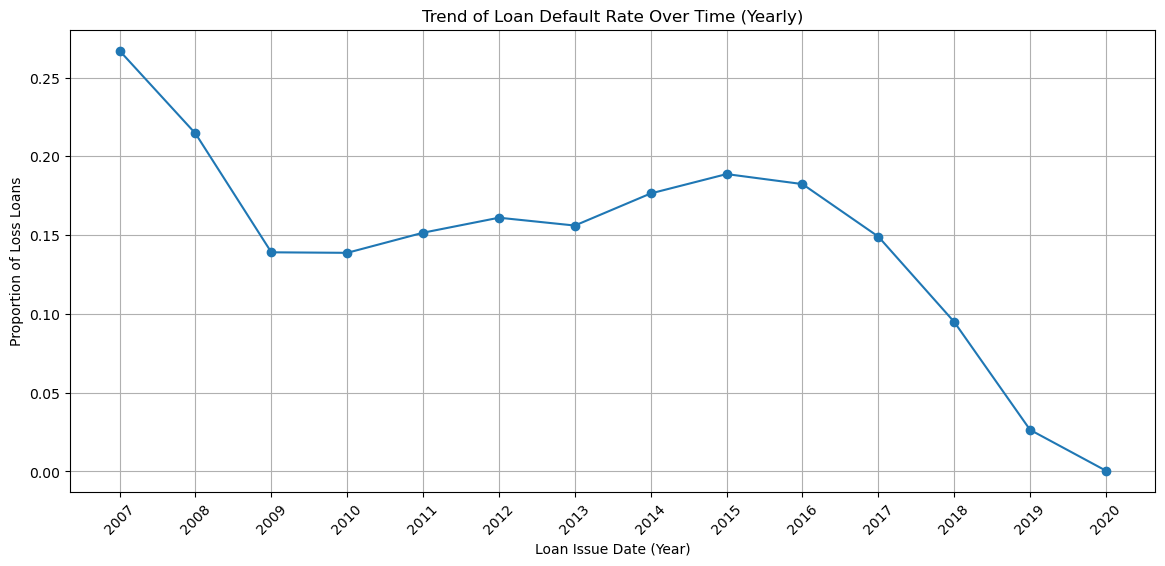

In [21]:
# Convert issue_d to datetime
df_train_dropped['issue_d'] = pd.to_datetime(df_train_dropped['issue_d'], format='%b-%Y')
# Group by month-year and calculate the proportion of "loss" loans
loss_rate = df_train_dropped.groupby(df_train_dropped['issue_d'].dt.to_period('Y'))['loan_category'].apply(lambda x: (x == 'Loss').mean())

# Plot the trend
plt.figure(figsize=(14, 6))
#x_labels = loss_rate.index.astype(str)[::4]  # Show every 4th label
plt.plot(loss_rate.index.astype(str), loss_rate.values, marker='o', linestyle='-')
#plt.xticks(ticks=x_labels, rotation=45)
plt.xticks(rotation=45)
plt.xlabel("Loan Issue Date (Year)")
plt.ylabel("Proportion of Loss Loans")
plt.title("Trend of Loan Default Rate Over Time (Yearly)")
plt.grid(True)
plt.show()

In [22]:
# convert issue_d to an Ordinal Feature
df_train_dropped['issue_d_ordinal'] = df_train_dropped['issue_d'].dt.year - df_train_dropped['issue_d'].dt.year.min()
#df_train_dropped.drop(columns=['issue_d'], inplace=True)  # Drop original datetime column

In [23]:
df_train_dropped['issue_d_ordinal'].max()

13

In [24]:
import scipy.stats as stats

# Separate groups
loss_loans = df_train_dropped[df_train_dropped['loan_category'] == 'Loss']['issue_d_ordinal']
good_loans = df_train_dropped[df_train_dropped['loan_category'] == 'Good']['issue_d_ordinal']

# Perform t-test
t_stat, p_value = stats.ttest_ind(loss_loans, good_loans, equal_var=False) 

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -227.41298113838894, P-value: 0.0


In [25]:
mann_p_value = stats.mannwhitneyu(loss_loans, good_loans, alternative='two-sided')
mann_p_value

MannwhitneyuResult(statistic=94255243675.5, pvalue=0.0)

1. Independent t-test:
* The t-test compares the means of two independent groups: "Loss" loans and "Good" loans
* A very large negative T-statistic suggests that "Loss" loans have significantly lower issue_d_ordinal values than "Good" loans.
* p-value of 0.0 indicates a highly significant difference between the "Loss" and "Good" loan categories in terms of issue_d_ordinal.
* Conclusion: "Loss" loans tend to have been issued much earlier than "Good" loans.
2. Mann-Whitney U test
* It compares medians instead of means.
* A large U-statistic means the two distributions are very different.
* P-value = 0.0 confirms that "Loss" and "Good" loans have significantly different issue_d_ordinal values.
* Conclusion: "Loss" loans were issued at different time periods compared to "Good" loans.